In [1]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
g1 = np.random.normal(loc=1.0, size=(500,2))
g2 = np.random.normal(loc=-1.0, size=(500,2))
X_train = np.concatenate((g1, g2))
print(len(X_train))

1000


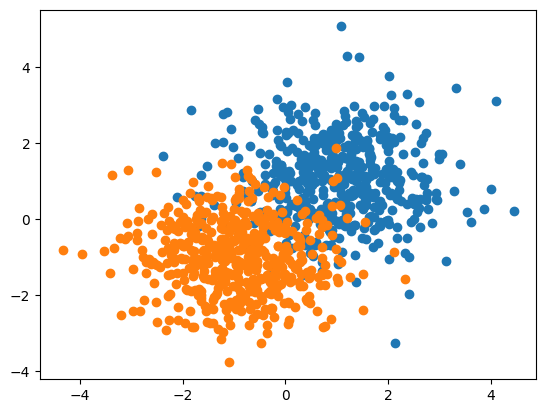

In [3]:
x1, y1 = g1.T
x2, y2 = g2.T

plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.savefig("images/gmm_original")

In [4]:
gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)

GaussianMixture(n_components=2)

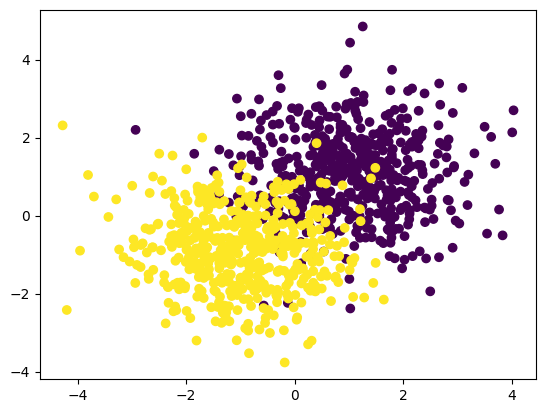

In [5]:
X, y = gmm.sample(1000)
plt.scatter(X[:,0], X[:,1], c=y)
plt.savefig("images/gmm_0")

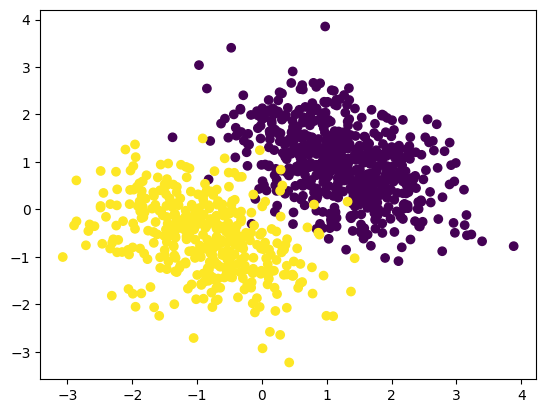

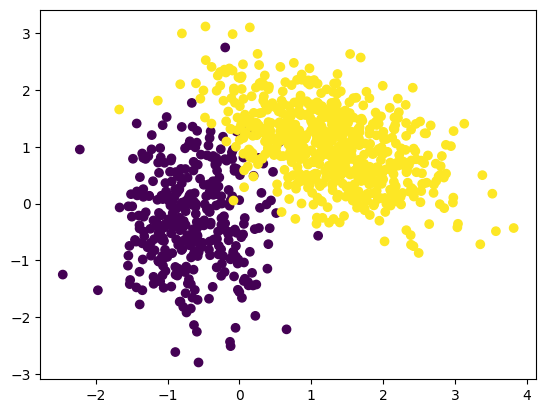

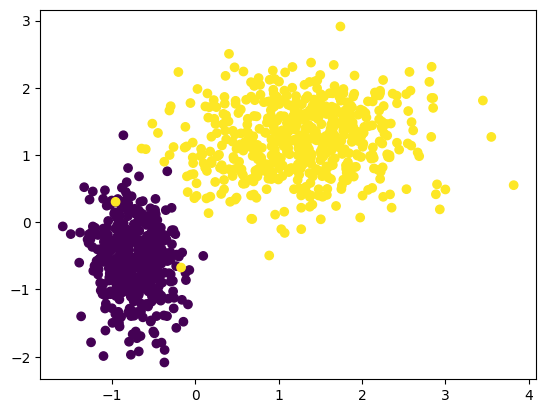

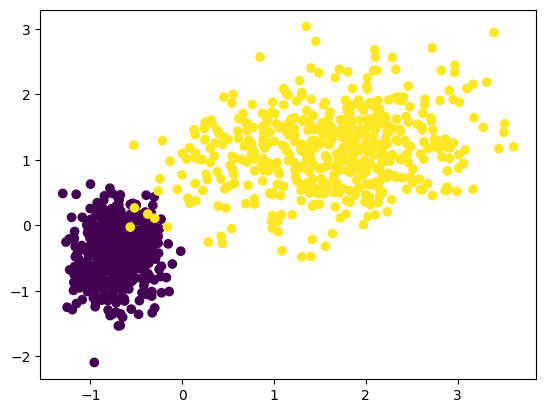

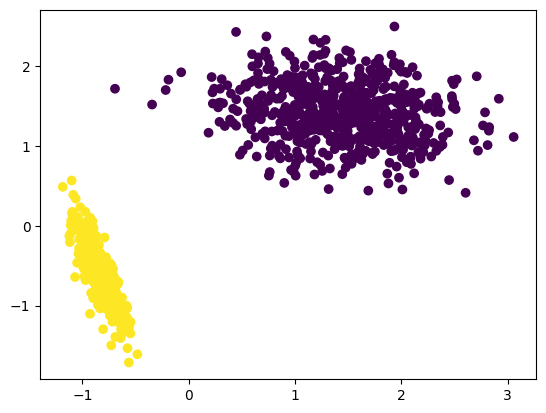

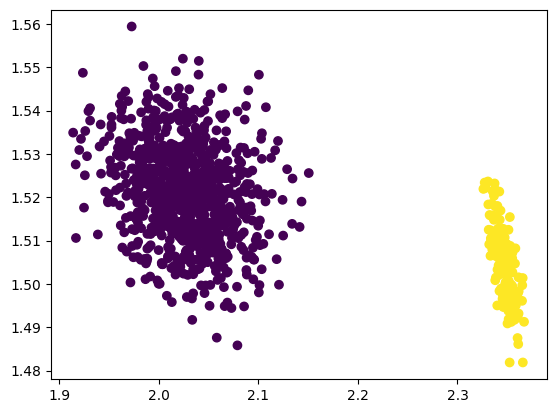

In [6]:
checkpoints = [50, 100, 150, 200, 350, 2000]
for i in range(2000):
    gmm = GaussianMixture(n_components=2)
    gmm.fit(X)
    X, y = gmm.sample(1000)
    if i+1 in checkpoints:
        plt.scatter(X[:,0], X[:,1], c=y)
        plt.savefig(f"images/gmm_{i+1}")
        plt.show()

In [7]:
sample_sizes = [500, 1000, 10000, 50000, 200000]
distances = [[],[],[],[],[]]
for i, sample_size in enumerate(sample_sizes):
    print(f"Sample size {sample_size}")
    g1 = np.random.normal(loc=1.0, size=(sample_size//2,2))
    g2 = np.random.normal(loc=-1.0, size=(sample_size//2,2))
    X_train = np.concatenate((g1, g2))

    gmm_0 = GaussianMixture(n_components=2)
    gmm_0.fit(X_train)
    X, y = gmm_0.sample(sample_size)
    distances[i].append(np.mean(np.linalg.norm(X-X_train, axis=1)))

    for _ in range(2000):
        gmm = GaussianMixture(n_components=2)
        gmm.fit(X)
        X, y = gmm.sample(sample_size)
        distances[i].append(np.mean(np.linalg.norm(X-X_train, axis=1)))

Sample size 500
Sample size 1000
Sample size 10000
Sample size 50000
Sample size 200000


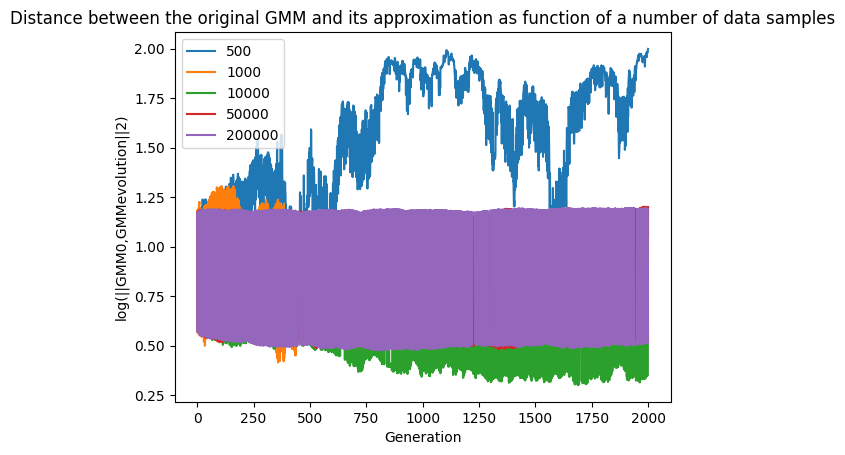

In [14]:
for i, distance in enumerate(distances):
    plt.plot(np.log(distance), label=f"{sample_sizes[i]}")
plt.title("Distance between the original GMM and its approximation as function of a number of data samples")
plt.ylabel("log(||GMM0,GMMevolution||2)")
plt.xlabel("Generation")
plt.legend()
plt.savefig("images/gmm_distance_graph")

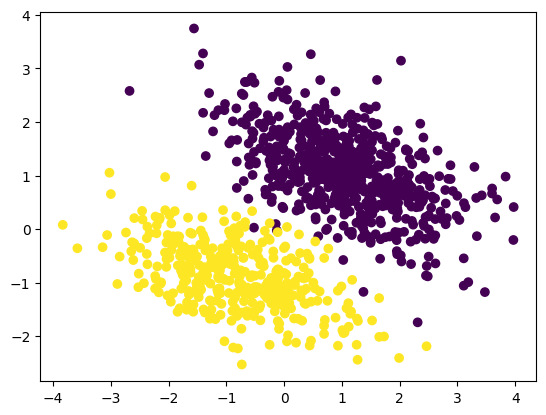

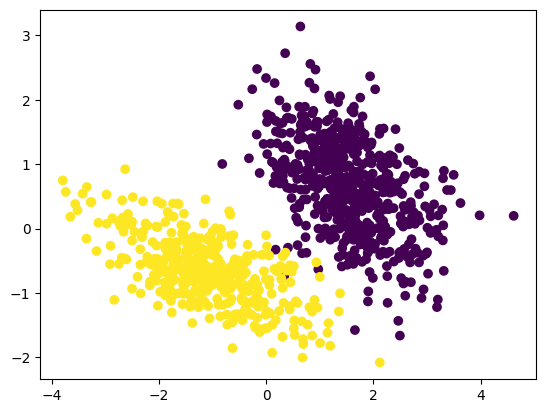

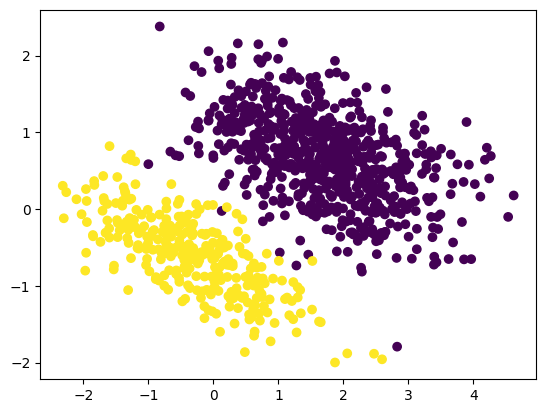

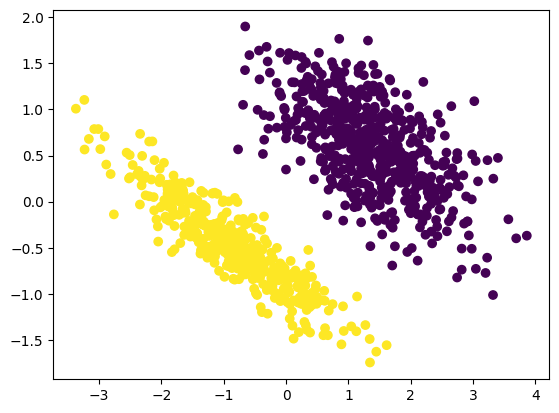

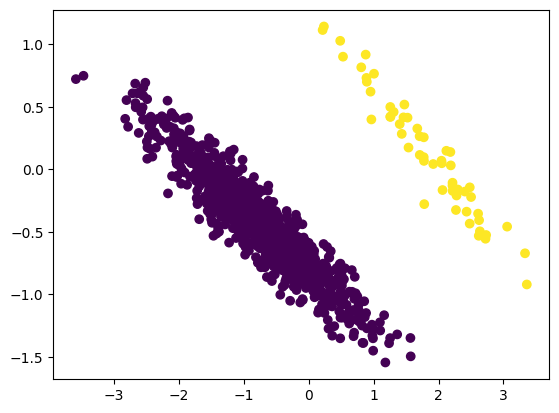

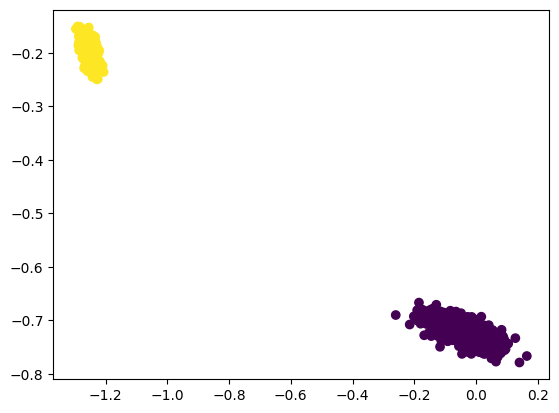

In [13]:
g1 = np.random.normal(loc=1.0, size=(500,2))
g2 = np.random.normal(loc=-1.0, size=(500,2))
X_train = np.concatenate((g1, g2))

gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)

X, y = gmm.sample(1000)
X += np.random.normal(loc=0, size=(1000,2)) * 0.1
checkpoints = [50, 100, 150, 200, 350, 2000]
for i in range(2000):
    gmm = GaussianMixture(n_components=2)
    gmm.fit(X)
    X, y = gmm.sample(1000)
    if i+1 in checkpoints:
        plt.scatter(X[:,0], X[:,1], c=y)
        plt.savefig(f"images/gmm_noise_{i+1}")
        plt.show()